# Python Project

   ## Data Cleaning and Preprocessing

   ### Preprocessing Steps :

In [26]:
# Step 1: Importing libraries
import numpy as np
import pandas as pd

# Step 2: Acquire dataset
data = pd.read_excel(r"C:\Users\aksha\Desktop\Module 4.xlsx")

# Step 3: Preview the dataset
data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,175,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,163,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,162,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,156,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,150,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,152,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,154,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,171,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,161,231,Kansas,947276.0


In [27]:
# Step 4: Finding missing data and Fill missing values in 'College' column with mode
data['College'] = data['College'].fillna(data['College'].mode()[0])

# Fill missing values in 'Salary' column with median
data['Salary'] = data['Salary'].fillna(data['Salary'].median())

print("Missing Values:\n", data.isnull().sum())

Missing Values:
 Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64


In [28]:
# Step 5: Finding outliers
import numpy as np
# Calculate Q1 and Q3
Q1 = np.percentile(data['Salary'], 25)
Q3 = np.percentile(data['Salary'], 75)
print("Q1:", Q1)
print("Q3:", Q3)
IQR = Q3 - Q1
print("IQR:", IQR)

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

# Get the outlier values
outliers = data[(data['Salary'] < lower_bound) | (data['Salary'] > upper_bound)]
outliers

Q1: 1100150.5
Q3: 6323553.0
IQR: 5223402.5
Lower bound: -6734953.25
Upper bound: 14158656.75


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
23,Brook Lopez,Brooklyn Nets,11,C,28,170,275,Stanford,19689000.0
33,Carmelo Anthony,New York Knicks,7,SF,32,164,240,Syracuse,22875000.0
82,Draymond Green,Golden State Warriors,23,PF,26,156,230,Michigan State,14260870.0
89,Klay Thompson,Golden State Warriors,11,SG,26,150,215,Washington State,15501000.0
96,Blake Griffin,Los Angeles Clippers,32,PF,27,171,251,Oklahoma,18907726.0
98,DeAndre Jordan,Los Angeles Clippers,6,C,27,156,265,Texas A&M,19689000.0
100,Chris Paul,Los Angeles Clippers,3,PG,31,155,175,Wake Forest,21468695.0
109,Kobe Bryant,Los Angeles Lakers,24,SF,37,168,212,Kentucky,25000000.0
111,Roy Hibbert,Los Angeles Lakers,17,C,29,173,270,Georgetown,15592217.0
143,DeMarcus Cousins,Sacramento Kings,15,C,25,180,270,Kentucky,15851950.0


In [29]:
# Step 6: Encoding Categorical Data
# # Convert 'College' column to categorical data type.
data['College'] = data['College'].astype('category')
print("Data Types:\n", data.dtypes)

Data Types:
 Name          object
Team          object
Number         int64
Position      object
Age            int64
Height         int64
Weight         int64
College     category
Salary       float64
dtype: object


In [30]:
# Step 7:  Replacing the values in the 'Height' column with random numbers between 150 and 180
import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_excel(r"C:\Users\aksha\Desktop\Module 4.xlsx")

# Replace 'Height' column values with random integers between 150 and 180
data['Height'] = np.random.randint(150, 181, size=len(data))

# Save the modified dataset
data.to_excel(r"C:\Users\aksha\Desktop\Module 4.xlsx", index=False)



# Task 1 : Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees.

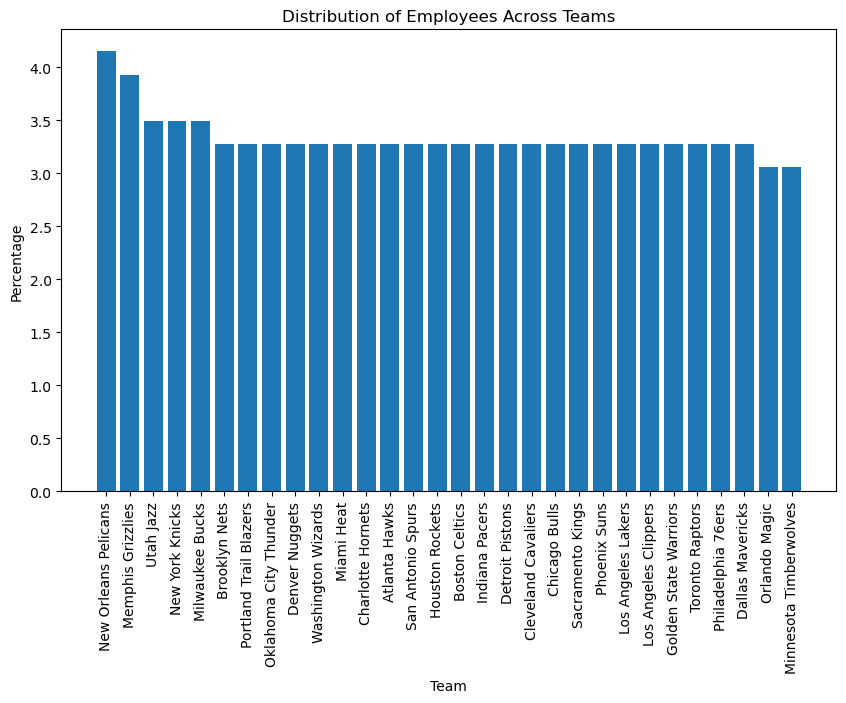

In [31]:
import matplotlib.pyplot as plt

team_counts = data['Team']. value_counts()
team_percentages = (team_counts / len(data)) * 100
# print(team_counts)
# print(team_percentages)

plt.figure(figsize=(10,6))
plt.bar(team_counts.index,team_percentages)
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Percentage')
plt.title('Distribution of Employees Across Teams')
plt.show()

# Insights: 

Based on the output, here are some conclusions we can draw:

 1. Team Distribution : The data shows that there are 30 Teams in total, with each team having a similar number of employees.

 2. Top Teams by Count : The top 5 teams by count are:

    
     New orleans Pelicans (19 employees)

    
     Memphis Grizzlies (18 employees)


     Utah Jazz (16 employees)

    
     New York Knicks (16 employees)

    
     Milwaukee Bucks (16 employees)

 3. Team Percentage Distribution : The percentage distribution of teams shows that most teams have around 3.27% of the total employees,indicating a relatively even distribution

 4. No Dominant Team : There isn't a single dominant team with a significantly higher number of employees. The distribution is relatively uniform across teams.

# Task 2: Segregate employees based on their positions within the company.

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


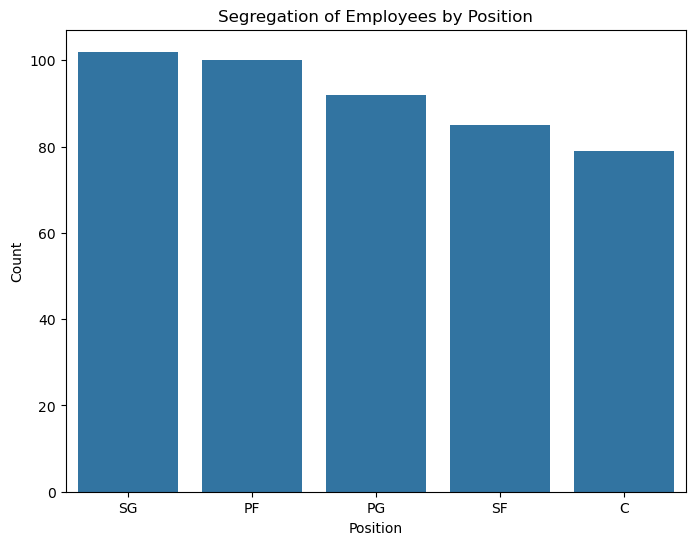

In [32]:
import seaborn as sns

position_counts = data['Position'].value_counts()
print(position_counts)

plt.figure(figsize=(8,6))
sns.barplot(x=position_counts.index, y=position_counts.values)
plt.xlabel("Position")
plt.ylabel("Count")
plt.title("Segregation of Employees by Position")
plt.show()

# Insights:

    1. Position Distribution : The data shows that the most common positions in the company are:
    (i) SG : 102 employeesPF: 100 employees  (ii) PG : 92 employees   (iii) SF : 85 employees   (iv) C : 79 employees

    2 . Position Segregation : The bar plot provides a clear visualization of the position distribution, making it easy to compare the number of employees in each position. 79

# Task 3: Identify the predominant age group among employees.

(20.0, 30.0]     346
(30.0, 40.0]      91
(9.999, 20.0]     21
(40.0, 50.0]       0
Name: count, dtype: int64


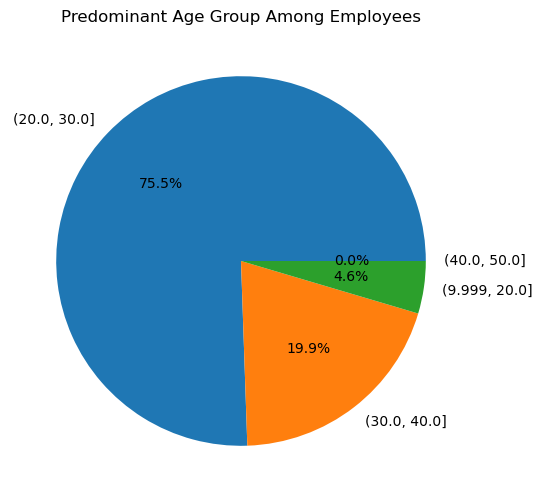

In [33]:
import matplotlib.pyplot as plt

age_groups = data['Age'].value_counts(bins=[10,20,30,40,50])
print(age_groups)

plt.figure(figsize=(8,6))
plt.pie(age_groups.values, labels=age_groups.index, autopct='%1.1f%%')
plt.title('Predominant Age Group Among Employees')
plt.show()

# Insights:
Based on the output, here are some insights

(I) . Age Group Distribution : The data shows that the employees are distributed across the following age groups:

               1.(9.999,20.0] : 21 employees(4.6%)
               2.(20.0, 30.0] : 346 employees(75.5%)
               3.(30.0, 40.0] : 91 employees(19.9%)
               4.(40.0, 50.0] : 0 employees

(II). Predominant Age group : The pie chart and the output clearly show that the predominant age group among employees is (20.0, 30.0], accounting for approximately 75.5% of the total employees.

(Here no one has the age greater than 40)



# Task 4: Discover which team and position have the highest salary expenditure.

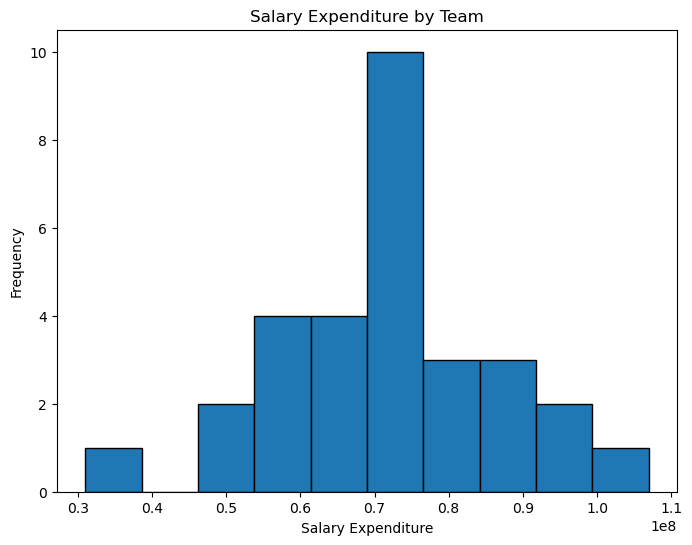

In [34]:
import matplotlib.pyplot as plt

position_salary_expenditure = data.groupby('Position')['Salary'].sum()
team_salary_expenditure = data.groupby('Team')['Salary'].sum()
# print(position_salary_expenditure)
# print(team_salary_expenditure)

plt.figure(figsize=(8,6))
plt.hist(team_salary_expenditure.values, bins=10, edgecolor='black')
plt.xlabel('Salary Expenditure')
plt.ylabel('Frequency')
plt.title('Salary Expenditure by Team')
plt.show()

# Insights:
Based on the output, here are some insights:

1. Team Salary Expenditure : The data shows the total salary expenditure for each team.

   The teams with the highest salary expenditure are:

           Cleveland Cavaliers: $106,988,689
   
           Los Angeles Clippers: $94,854,640
   
           Golden State Warriors: $88,868,997
   
           Oklahoma City Thunder: $84,442,733

2. Position Salary Expenditure : The data shows the total salary expenditure for each position.

   The teams with the Highest salary expenditure are (Top3):

           C : $466377332.0
     
           PF : $442560850.0
     
           PG : $446848971.00

3. Histogram : The histogram provides a visual representation of the salary expenditure distribution across teams. It appears to be a right-skewed distribution, indicating that most teams have relatively lower salary expenditures.

# Task : 5 Investigate if there's any correlation between age and salary, and represent it visually.

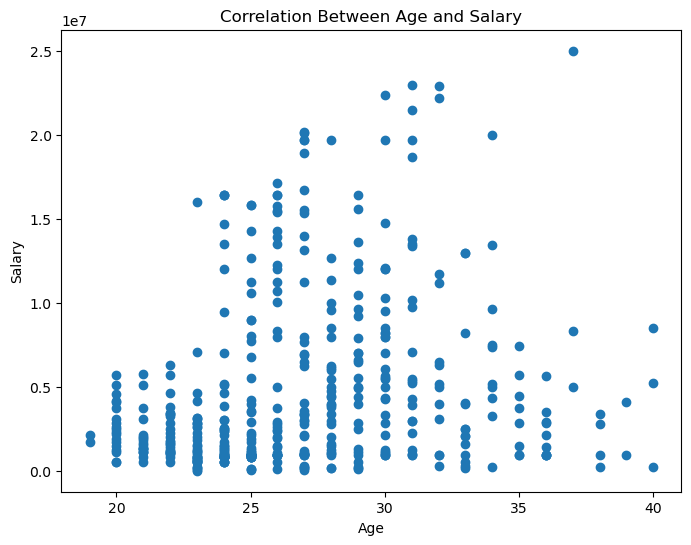

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(data['Age'],data['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Correlation Between Age and Salary')
plt.show()

In [36]:
correlation_coefficient = data['Age'].corr(data['Salary'])
print('Correlation Coefficient:', correlation_coefficient)

Correlation Coefficient: 0.21400941226570974


# Insights:
1. Correlation Coefficient : The correlation coefficient between Age and Salary is approximately 0.21. This indicates as a weak positive correlation as age increases, salary also tends to increase, but the relationship is not very strong.

2. Scatter plot : The scatter plot provides a visual representation of the relationship between Age and Salary. The plot appears to be somewhat scattered, indicating that the correlation is not very strong.